In [2]:
import numpy
import scipy
import matplotlib.pyplot as plt
from astropy.stats import sigma_clip
import logging

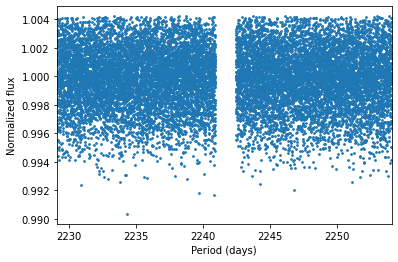

In [45]:
import numpy as np
import pandas as pd
import scipy.signal
import matplotlib.pyplot as plt
from astropy.stats import sigma_clip
import logging
logging.basicConfig(level=logging.DEBUG)
logger = logging.getLogger('matplotlib')
logger.setLevel(logging.CRITICAL)

#df=pd.read_csv(r'./personal_epochs/thaddaeus/march_2022/misc/bls_demo_data.csv')
df=pd.read_csv(r'C:\Users\Kiana\OneDrive\Documents\GitHub\sunnyhills\personal_epochs\thaddaeus\march_2022\misc\bls_demo_data.csv')
t = np.array(df['time'])
y = np.array(df['flux'])

trend = scipy.signal.medfilt(y, 25)
y_filt = y /trend
y_filt = sigma_clip(y_filt, sigma_upper=2, sigma_lower=float('inf'))

plt.plot(lw=0.5)
ax = plt.gca()
ax.scatter(t, y_filt, s=3)
ax.set_xlim(t.min(), t.max())
#ax.set_xlim(t.min(), t.min()+1)
ax.set_xlabel("Period (days)")
ax.set_ylabel("Normalized flux");

Gap because of gap in data?

In [ ]:

fig
#plt.plot = plt.plot.plot
#subplots(2, 1, sharex=True, figsize=(6, 6))
#plt.plot.plot(t, y, "k")
#plt.plot.plot(t, trend)
#plt.plot.set_ylabel("Flux (electrons per sec)")
ax = axes[1]
plt.plot(t, y_filt, "k")
#plt.set_xlim(t.min(), t.mplt())
ax.set_xlabel("Time (days)")
ax.set_ylabel("Normalized flux");

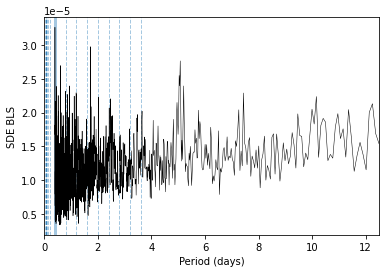

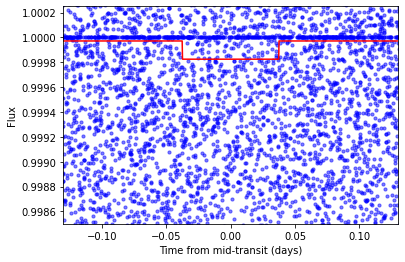

In [18]:
from astropy.stats import BoxLeastSquares
durations = numpy.linspace(0.05, 0.2, 20)
model_bls = BoxLeastSquares(t, y_filt)
results_bls = model_bls.autopower(durations, frequency_factor=10)
period = results_bls.period[numpy.argmax(results_bls.power)]

plt.figure()
ax = plt.gca()
ax.axvline(period, alpha=0.4, lw=3)
for n in range(2, 10):
    ax.axvline(n*period, alpha=0.4, lw=1, linestyle="dashed")
    ax.axvline(period / n, alpha=0.4, lw=1, linestyle="dashed")
plt.ylabel(r'SDE BLS')
plt.xlabel('Period (days)')
plt.plot(results_bls.period, results_bls.power, color='black', lw=0.5)
plt.xlim(0, max(results_bls.period));

index = numpy.argmax(results_bls.power)
period = results_bls.period[index]
t0 = results_bls.transit_time[index]
duration = results_bls.duration[index]

plt.figure()
ax = plt.gca()
x = (t - t0 + 0.5*period) % period - 0.5*period
m = numpy.abs(x) < 0.5
plt.scatter(
    x[m],
    y_filt[m],
    color='blue',
    s=10,
    alpha=0.5,
    zorder=2)
x = numpy.linspace(-0.13, 0.13, 1000)
f = model_bls.model(x + t0, period, duration, t0)
ax.plot(x, f, color='red')
ax.set_xlim(-0.13, 0.13)
plt.ylim(0.9985, 1.00025)
ax.set_xlabel("Time from mid-transit (days)")
ax.set_ylabel("Flux");

Notes
t=timestamps
y=observations (brightness)
dy=error bars
snr=signal to noise ratio
objective="snr": like log function, makes more reliable transit